In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install transformers
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [3]:
! pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.5 MB/s eta 0:00:00


In [86]:
import contractions
from bs4 import BeautifulSoup
import numpy as np
import re
import tqdm
import unicodedata
import torch
from tensorflow.keras.preprocessing.text import Tokenizer

In [5]:
# use gpus using torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cuda')

# 1. Data Preprocessing and Exploratory Data Analysis (EDA)


In [6]:
def strip_html_tags(text):
  """
  Removes HTML tags from the given text and returns the resulting text.
  """
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

In [7]:
def remove_accented_chars(text):
  """
  Removes accented characters from the given text and returns the resulting text.
  """
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

In [8]:
def remove_accented_chars(text):
  """
  Removes accented characters from the given text and returns the resulting text.
  """
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

In [9]:
def pre_process_corpus(docs):
  """
  Preprocesses a list of documents by performing various text normalization tasks.
  """
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()
    norm_docs.append(doc)

  return norm_docs

In [11]:
import zipfile
import pandas as pd

# Path to the zip file
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/AI FINAL PROJECT/test.csv.zip'

# Unzip the file and read the Excel file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List the contents of the zip file
    zip_contents = zip_ref.namelist()
    print("Contents of the zip file:", zip_contents)

    # Extract the Excel file from the zip file
    excel_file_name = zip_contents[0]
    zip_ref.extract(excel_file_name, '/tmp')  # Extract to a temporary directory

    # Read the Excel file using pandas
    excel_file_path = f'/tmp/{excel_file_name}'
    dataset_test = pd.read_csv(excel_file_path) # Use read_csv since the file is likely a csv file

# Display the first few rows of the dataframe
print(dataset_test.head())
dataset_test.info()

Contents of the zip file: ['test.csv']
   class_index                  review_title  \
0            1               mens ultrasheer   
1            4       Surprisingly delightful   
2            2  Works, but not as advertised   
3            2                       Oh dear   
4            2               Incorrect disc!   

                                         review_text  
0  This model may be ok for sedentary types, but ...  
1  This is a fast read filled with unexpected hum...  
2  I bought one of these chargers..the instructio...  
3  I was excited to find a book ostensibly about ...  
4  I am a big JVC fan, but I do not like this mod...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650000 entries, 0 to 649999
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   class_index   650000 non-null  int64 
 1   review_title  649974 non-null  object
 2   review_text   650000 non-null  object
dtypes: int64(1),

In [12]:
# Path to the zip file
zip_file_path = '/content/drive/MyDrive/train.csv.zip'

# Unzip the file and read the Excel file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List the contents of the zip file
    zip_contents = zip_ref.namelist()
    print("Contents of the zip file:", zip_contents)

    # Extract the Excel file from the zip file

    excel_file_name = zip_contents[0]
    zip_ref.extract(excel_file_name, '/tmp')  # Extract to a temporary directory

    # Read the Excel file using pandas
    excel_file_path = f'/tmp/{excel_file_name}'
    dataset_train = pd.read_csv(excel_file_path)

# Display the first few rows of the dataframe
print(dataset_train.head())

Contents of the zip file: ['train.csv']
   class_index                           review_title  \
0            3                     more like funchuck   
1            5                              Inspiring   
2            5  The best soundtrack ever to anything.   
3            4                       Chrono Cross OST   
4            5                    Too good to be true   

                                         review_text  
0  Gave this to my dad for a gag gift after direc...  
1  I hope a lot of people hear this cd. We need m...  
2  I'm reading a lot of reviews saying that this ...  
3  The music of Yasunori Misuda is without questi...  
4  Probably the greatest soundtrack in history! U...  


In [13]:
# Shuffling Data
train = dataset_train.sample(frac=1)
test = dataset_test.sample(frac=1)

# Taking only a small peice of the dataset to avoid long training time

test = dataset_test.iloc[:70000,:]
val = dataset_train.iloc[:70000,:]
train = dataset_train.iloc[70000:,:]
train = dataset_train.iloc[:100000,:]

# Splitting data to train and validation sets manually, only including neccessary columns
X_train = train['review_text'].values
y_train = train['class_index'].values

X_val = val['review_text'].values
y_val = val['class_index'].values

X_test = test['review_text'].values
y_test = test['class_index'].values

**Pre-processing the Data (the Reviews)**

In [14]:
#Pre-processing the Data (the Reviews)
X_train = pre_process_corpus(X_train)
X_val = pre_process_corpus(X_val)
X_test = pre_process_corpus(X_test)

  0%|          | 0/100000 [00:00<?, ?it/s]<ipython-input-6-99d8d0b082a7>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
100%|██████████| 70000/70000 [00:11<00:00, 6281.04it/s]


In [15]:
# Taking a smaller fraction of the dataset to avoid long training times
fraction = 0.1  # Use 10% of the data

train_sample = train.sample(frac=fraction)
val_sample = val.sample(frac=fraction)
test_sample = test.sample(frac=fraction)
# Splitting data to train and validation sets manually, only including neccessary columns
X_train = train_sample['review_text'].values
y_train = train_sample['class_index'].values

X_val = val_sample['review_text'].values
y_val = val_sample['class_index'].values

X_test = test_sample['review_text'].values
y_test = test_sample['class_index'].values


In [87]:
# Tokenazing the Data (the Reviews)
t = Tokenizer(oov_token='<UNK>')
# fit the tokenizer on train documents
t.fit_on_texts(X_train)
t.word_index['<PAD>'] = 0

In [88]:
# Calculating the Vocabulary Size and the number of Reviews

print("Vocabulary size={}".format(len(t.word_index)))
print("Number of Reviews={}".format(t.document_count))

Vocabulary size=35673
Number of Reviews=10000


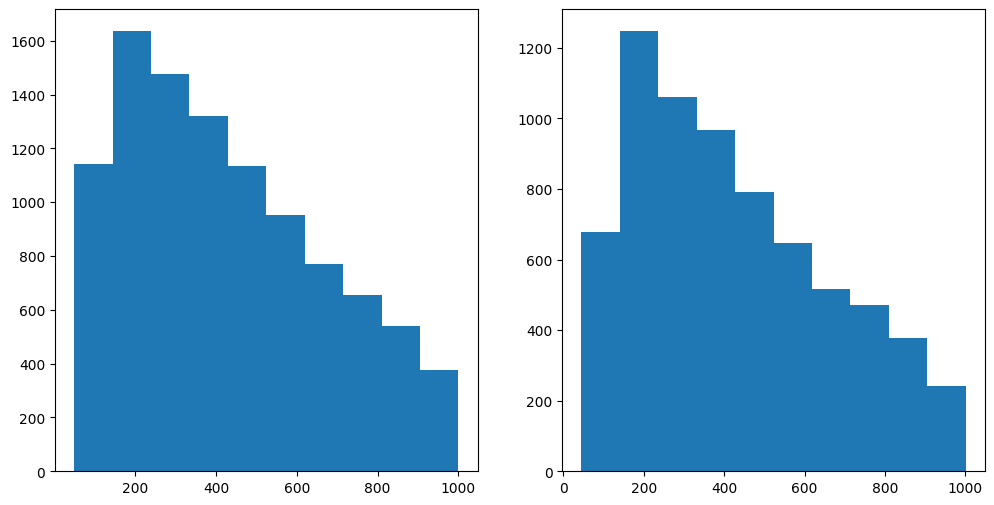

In [89]:
# Plotting the size of the sequences

import matplotlib.pyplot as plt
%matplotlib inline

train_lens = [len(s) for s in X_train]
test_lens = [len(s) for s in X_test]

fig, ax = plt.subplots(1,2, figsize=(12, 6))
h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(test_lens)

# 2. Feature Engineering

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)


# 3. Model Training

In [16]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, max_length=512)

train_encodings = tokenize_function(X_train)
val_encodings = tokenize_function(X_val)
test_encodings = tokenize_function(X_test)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [93]:
import torch
from torch.utils.data import DataLoader, Dataset

class ReviewDataset(Dataset):
    """
    A custom dataset class for review data.
    """
    def __init__(self, encodings, labels): # Removed extra underscore from def__init__
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx] - 1)  # Adjust label to be zero-indexed
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, y_train)
val_dataset = ReviewDataset(val_encodings, y_val)
test_dataset = ReviewDataset(test_encodings, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [24]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)
model.to(device) #set model to use GPU

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=20,
    per_device_train_batch_size=2,  # Smaller batch size
    gradient_accumulation_steps=1000,
    per_device_eval_batch_size=8,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="steps",
    save_steps=10000,  # Save checkpoint every 10,000 steps
    save_total_limit=3,  # Only keep the latest 2 checkpoints
    fp16=True  # Use mixed precision training
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=lambda p: {"accuracy": (p.predictions.argmax(-1) == p.label_ids).astype(float).mean().item()}
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [25]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy
10,1.645400,1.640859,0.193143
20,1.637500,1.627767,0.197000
30,1.623900,1.612784,0.200857
40,1.612600,1.601716,0.212714
50,1.601800,1.589730,0.235143
60,1.588500,1.570696,0.278000
70,1.565000,1.535529,0.334143
80,1.517400,1.476539,0.373857
90,1.451000,1.400190,0.430286


Step,Training Loss,Validation Loss,Accuracy
10,1.645400,1.640859,0.193143
20,1.637500,1.627767,0.197000
30,1.623900,1.612784,0.200857
40,1.612600,1.601716,0.212714
50,1.601800,1.589730,0.235143
60,1.588500,1.570696,0.278000
70,1.565000,1.535529,0.334143
80,1.517400,1.476539,0.373857
90,1.451000,1.400190,0.430286
100,1.373900,1.318473,0.460714


TrainOutput(global_step=100, training_loss=1.5616973304748536, metrics={'train_runtime': 3820.7862, 'train_samples_per_second': 52.345, 'train_steps_per_second': 0.026, 'total_flos': 2.84702052588e+16, 'train_loss': 1.5616973304748536, 'epoch': 20.0})

In [26]:
eval_results = trainer.evaluate()
print(f"Validation Results: {eval_results }")

Validation Results: {'eval_loss': 1.3184731006622314, 'eval_accuracy': 0.4607142857142857, 'eval_runtime': 14.1055, 'eval_samples_per_second': 496.262, 'eval_steps_per_second': 62.033, 'epoch': 20.0}


In [65]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [27]:
import os

In [55]:
import os

# Define the save directory
save_directory = '/content/drive/MyDrive/Colab Notebooks/AI FINAL PROJECT'

# Create the directory if it doesn't exist
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Verify the directory
print(f"Model will be saved to: {save_directory}")


Model will be saved to: /content/drive/MyDrive/Colab Notebooks/AI FINAL PROJECT


In [56]:
from transformers import BertForSequenceClassification, BertTokenizer

# Assuming 'model' is your trained model and 'tokenizer' is your tokenizer
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

print(f"Model and tokenizer saved to: {save_directory}")


Model and tokenizer saved to: /content/drive/MyDrive/Colab Notebooks/AI FINAL PROJECT


In [30]:
!pip install streamlit ngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [80]:
from transformers import BertForSequenceClassification, BertTokenizer, AutoConfig
from safetensors.torch import load_file
import torch

# Define the save directory
save_directory = '/content/drive/MyDrive/Colab Notebooks/AI FINAL PROJECT'

# Load the model configuration # Use AutoConfig to load the config
config = AutoConfig.from_pretrained(save_directory)

# Load the model weights
model = BertForSequenceClassification(config) # Pass the config object here
model_weights = load_file(f"{save_directory}/model.safetensors")
model.load_state_dict(model_weights)

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained(save_directory)

print("Model and tokenizer loaded successfully")

Model and tokenizer loaded successfully


# 5. Deployment with Streamlit

In [78]:
%%writefile app.py
import streamlit as st
from transformers import pipeline, BertForSequenceClassification, BertTokenizer

# Ensure model and tokenizer are loaded
def load_model_and_tokenizer():
    from transformers import BertForSequenceClassification, BertTokenizer, AutoConfig
    from safetensors.torch import load_file
    import torch

    save_directory = '/content/drive/MyDrive/Colab Notebooks/AI FINAL PROJECT'

    config = AutoConfig.from_pretrained(save_directory)
    model = BertForSequenceClassification(config)
    model_weights = load_file(f"{save_directory}/model.safetensors")
    model.load_state_dict(model_weights)
    tokenizer = BertTokenizer.from_pretrained(save_directory)
    return model, tokenizer

model, tokenizer = load_model_and_tokenizer()
nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# Streamlit app
st.set_page_config(page_title="Product Review Rating Predictor", layout="wide")

st.title("Product Review Rating Predictor")
st.write("Welcome to the Product Review Rating Predictor. Enter your review text below and click 'Predict Rating' to see the predicted rating.")


# Main content
col1, col2 = st.columns([2, 1])

with col1:
    review_text = st.text_area("Enter the product review text:")

with col2:
    if st.button("Predict Rating"):
        result = nlp(review_text)
        label = result[0]['label']
        rating = int(label.split('_')[1]) + 1  # Adjust the rating from 1 to 5
        st.write(f"Predicted Rating: {rating}")

st.sidebar.write("Thank you for using the Product Review Rating Predictor.")


Overwriting app.py


In [82]:
from pyngrok import ngrok

# Get your authtoken from https://dashboard.ngrok.com/get-started/your-authtoken
NGROK_AUTH_TOKEN = "2kFl8xzPTITIOlzw4EVQwcDUDy3_62JNYQouEXpQLb5ZzjvRo"  # Replace with your actual token
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Terminate open tunnels if necessary
ngrok.kill()

# Set up a tunnel to the streamlit app
public_url = ngrok.connect(addr=8501)
print(f"Streamlit app will be accessible from: {public_url}")

# Run the Streamlit app
!streamlit run app.py --server.port 8501


Streamlit app will be accessible from: NgrokTunnel: "https://cbb3-34-142-156-103.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.142.156.103:8501

2024-08-05 21:39:22.641420: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-05 21:39:22.669051: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-05 21:39:22.677378: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-05 21:39:23.911294: W tensorflow/compiler/tf2tensorrt/ut

In [66]:
from pyngrok import ngrok

NGROK_AUTH_TOKEN = "2kFl8xzPTITIOlzw4EVQwcDUDy3_62JNYQouEXpQLb5ZzjvRo"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Terminate open tunnels if necessary
ngrok.kill()

# Set up a tunnel to the streamlit app
# Use 'addr' instead of 'port' to specify the port
public_url = ngrok.connect(addr=8501)
print(f"Streamlit app will be accessible from: {public_url}")

# Run the Streamlit app
!streamlit run app.py --server.port 8501

Streamlit app will be accessible from: NgrokTunnel: "https://1e3e-34-142-156-103.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.142.156.103:8501

2024-08-05 20:47:45.628049: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-05 20:47:45.653464: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-05 20:47:45.661051: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-05 20:47:46.920045: W tensorflow/compiler/tf2tensorrt/ut